In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from workalendar.usa import UnitedStates
from datetime import datetime as dt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import KFold

import numpy as np

In [293]:
train = pd.read_csv("/Users/imsuyeon/Downloads/ESAA/프로젝트/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [294]:
test = pd.read_csv("/Users/imsuyeon/Downloads/ESAA/프로젝트/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [295]:
train["datetime"] = pd.to_datetime(train["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [296]:
train["year"] = train['datetime'].dt.year
train["month"] = train['datetime'].dt.month
train["day"] = train['datetime'].dt.day
train["hour"] = train['datetime'].dt.hour
train["minute"] = train['datetime'].dt.minute
train["second"] = train['datetime'].dt.second

In [297]:
test["datetime"] = pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [298]:
test["year"] = test['datetime'].dt.year
test["month"] = test['datetime'].dt.month
test["day"] = test['datetime'].dt.day
test["hour"] = test['datetime'].dt.hour
test["minute"] = test['datetime'].dt.minute
test["second"] = test['datetime'].dt.second

In [299]:
cal=UnitedStates()
train['weekday'] = train['datetime'].dt.weekday

In [300]:
cal=UnitedStates()
test['weekday'] = test['datetime'].dt.weekday

In [301]:
def hour(hour) :
    if hour in [0, 1, 2, 3, 4]:
        return 1
    elif hour in [5, 6, 7, 8, 9]:
        return 2
    elif hour in [10, 11, 12, 13, 14, 15, 16]:
        return 3
    elif hour in [17, 18, 19, 20, 21, 22, 23]:
        return 4

In [302]:
train["hour2"] = train["hour"].apply(hour)

In [303]:
test["hour2"] = test["hour"].apply(hour)

In [304]:
def season(month):
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    elif month in [12, 1, 2]:
        return 4

In [305]:
train["season"] = train["month"].apply(season)

In [306]:
test["season"] = test["month"].apply(season)

In [307]:
train.loc[train['weather']==4, 'weather']=3

In [308]:
def hour(hour) :
    if hour in [0, 1, 2, 3, 4]:
        return 1
    elif hour in [5, 6, 7, 8, 9]:
        return 2
    elif hour in [10, 11, 12, 13, 14, 15, 16]:
        return 3
    elif hour in [17, 18, 19, 20, 21, 22, 23]:
        return 4

In [309]:
train["hour2"] = train["hour"].apply(hour)

In [310]:
test["hour2"] = test["hour"].apply(hour)

In [311]:
windspeed_0 = train[train["windspeed"] == 0]
windspeed_not0 = train[train["windspeed"] != 0]

In [312]:
ws0 = windspeed_0[["season", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]

In [313]:
wsnot0 = windspeed_not0[["season", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]

In [314]:
ws = windspeed_not0["windspeed"]

In [315]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [316]:
model.fit(wsnot0, ws)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [317]:
windspeed_0["windspeed"] = model.predict(ws0)

/Users/imsuyeon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
windspeed_0_t = test[test["windspeed"] == 0]

In [319]:
windspeed_not0_t = test[test["windspeed"] != 0]

In [320]:
ws0_t = windspeed_0_t[["season", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]

In [321]:
wsnot0_t = windspeed_not0_t[["season", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]

In [322]:
ws_t = windspeed_not0_t["windspeed"]

In [323]:
model.fit(wsnot0_t, ws_t)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [324]:
windspeed_0_t["windspeed"] = model.predict(ws0_t)

/Users/imsuyeon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [325]:
windspeed_t = pd.concat([windspeed_0_t, windspeed_not0_t], axis = 0)["windspeed"]

In [333]:
test["windspeed"] = windspeed_t

In [334]:
train['log_count'] = np.log(train["count"] + 1)

In [335]:
train_x = train[['season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'weekday']]
train_y = train['log_count']

In [336]:
test_x = test[['season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'weekday']]

In [337]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [338]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "max_depth" : [10, 30, 50, 70, 90],
    "max_features" : [0.1, 0.3, 0.5, 0.7, 0.9],
}
GS = GridSearchCV(model, param_grid = parameters, cv = 20, scoring = rmsle_scorer)
GS.fit(train_x, train_y)

In [ ]:
GS.best_params

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [271]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list = []
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [272]:
%time score = cross_val_score(model, train_x, train_y, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

print("Score= {0:.5f}".format(score))

CPU times: user 3.96 s, sys: 2.89 s, total: 6.85 s
Wall time: 18.3 s
Score= 0.11307


In [273]:
model.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [274]:
log_predictions = model.predict(test_x)
predictions = np.exp(log_predictions) - 1
 
print(predictions.shape)
predictions[0:10]

(6493,)


array([  9.37307773,   3.48846389,   2.0392899 ,   1.77661166,
         1.48337902,   4.44883064,  34.8986002 ,  92.0076053 ,
       200.80328288, 123.29808003])

[Text(0.5, 1.0, 'test')]

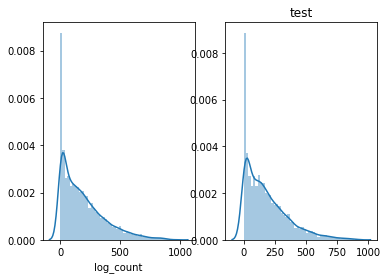

In [275]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.distplot(np.exp(train_y)-1,ax=ax1,bins=50)
ax2.set(title="test")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [276]:
submission = pd.read_csv("/Users/imsuyeon/Downloads/ESAA/프로젝트/sampleSubmission.csv")
 
submission["count"] = predictions
submission.to_csv("/Users/imsuyeon/Downloads/ESAA/프로젝트/submission.csv", index=False)

In [277]:
pd.read_csv("/Users/imsuyeon/Downloads/ESAA/프로젝트/submission.csv")

,datetime,count
0,2011-01-20 00:00:00,9.373078
1,2011-01-20 01:00:00,3.488464
2,2011-01-20 02:00:00,2.039290
3,2011-01-20 03:00:00,1.776612
4,2011-01-20 04:00:00,1.483379
...,...,...
6488,2012-12-31 19:00:00,360.229585
6489,2012-12-31 20:00:00,237.267733
6490,2012-12-31 21:00:00,172.447112
6491,2012-12-31 22:00:00,116.810573
